In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
import  statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy import stats
from scipy.stats import boxcox

In [123]:
ASI_Base = pd.read_csv('ASI_Base.csv')

In [124]:
ASI_Base.head()

,Unnamed: 0,Year,Age,Gender,C1,C2,C3,C4,CTotal,DHEA,IF,INF,P17-OH,TotalIgA,GIgA,RandID
0,0,10,42,F,19.0,6,4.0,5.0,34,1.0,3.0,3.0,49.0,5.0,23.0,9383480749
1,1,11,60,F,12.0,7,4.0,7.0,30,2.0,3.0,22.0,15.0,7.0,5.0,2705809722
2,2,14,49,F,11.0,1,1.0,1.0,14,3.0,3.0,3.0,30.0,5.0,1.0,517281238
3,3,14,35,F,12.0,3,6.0,1.0,22,6.0,15.0,18.0,33.0,16.0,4.0,2356075951
4,4,13,53,F,20.0,7,4.0,3.0,34,5.0,3.0,7.0,9.0,5.0,13.0,9137475714


In [125]:
ASI_Base1 = ASI_Base[['Age','C1','C2','C3','C4','CTotal','DHEA','P17-OH','TotalIgA','GIgA']]

In [126]:
ASI_Base1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       255 non-null    int64  
 1   C1        252 non-null    float64
 2   C2        255 non-null    int64  
 3   C3        253 non-null    float64
 4   C4        253 non-null    float64
 5   CTotal    255 non-null    int64  
 6   DHEA      250 non-null    float64
 7   P17-OH    246 non-null    float64
 8   TotalIgA  248 non-null    float64
 9   GIgA      245 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 20.0 KB


In [127]:
ASI_Base1['Age'] = ASI_Base1['Age'].astype(int)

<ipython-input-127-b376b54e3541>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ASI_Base1['Age'] = ASI_Base1['Age'].astype(int)


In [128]:
ASI_Base1.dropna(inplace=True)

<ipython-input-128-a356c9faf015>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ASI_Base1.dropna(inplace=True)


In [129]:
ASI_Base1['C1'] = ASI_Base1['C1'].astype(int)

<ipython-input-129-a8058e978ca9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ASI_Base1['C1'] = ASI_Base1['C1'].astype(int)


In [130]:
ASI_Base1['C2'] = ASI_Base1['C2'].astype(int)

<ipython-input-130-dc636da5e3d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ASI_Base1['C2'] = ASI_Base1['C2'].astype(int)


In [131]:
ASI_Base1['C3'] = ASI_Base1['C3'].astype(int)

<ipython-input-131-d6a77880bdf9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ASI_Base1['C3'] = ASI_Base1['C3'].astype(int)


In [132]:
ASI_Base1['C4'] = ASI_Base1['C4'].astype(int)

<ipython-input-132-c06d5fb40014>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ASI_Base1['C4'] = ASI_Base1['C4'].astype(int)


In [133]:
ASI_Base1['CTotal'] = ASI_Base1['CTotal'].astype(int)

<ipython-input-133-ed5c79bf6909>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ASI_Base1['CTotal'] = ASI_Base1['CTotal'].astype(int)


In [134]:
ASI_Base1['DHEA'] = ASI_Base1['DHEA'].astype(int)

<ipython-input-134-2a892db57b1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ASI_Base1['DHEA'] = ASI_Base1['DHEA'].astype(int)


In [135]:
ASI_Base1['TotalIgA'] = ASI_Base1['TotalIgA'].astype(int)

<ipython-input-135-2b637e77653c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ASI_Base1['TotalIgA'] = ASI_Base1['TotalIgA'].astype(int)


In [136]:
ASI_Base1['GIgA'] = ASI_Base1['GIgA'].astype(int)

<ipython-input-136-1a4f1f14f081>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ASI_Base1['GIgA'] = ASI_Base1['GIgA'].astype(int)


In [137]:
ASI_Base1['AgeLOG'] = np.log(ASI_Base1['Age'])

<ipython-input-137-82eb4a2b5b96>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ASI_Base1['AgeLOG'] = np.log(ASI_Base1['Age'])


In [138]:
ASI_Base1.dropna(inplace=True)

<ipython-input-138-a356c9faf015>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ASI_Base1.dropna(inplace=True)


In [139]:
ASI_Base1['P17-OH'] = ASI_Base1['P17-OH'].astype(int)

<ipython-input-139-01212e7c04a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ASI_Base1['P17-OH'] = ASI_Base1['P17-OH'].astype(int)


In [140]:
ASI_Base1['P17-OHLOG'] = np.log(ASI_Base1['P17-OH'])

<ipython-input-140-65a2d0cb5955>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ASI_Base1['P17-OHLOG'] = np.log(ASI_Base1['P17-OH'])


In [141]:
ASI_Base1['CTotalLOG'] = np.log(ASI_Base1['CTotal'])

<ipython-input-141-f0e000572cef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ASI_Base1['CTotalLOG'] = np.log(ASI_Base1['CTotal'])


In [142]:
ASI_Base1['C1LOG'] = np.log(ASI_Base1['C1'])

<ipython-input-142-dfba8c20e9b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ASI_Base1['C1LOG'] = np.log(ASI_Base1['C1'])


In [143]:
ASI_Base1['C2LOG'] = np.log(ASI_Base1['C2'])

<ipython-input-143-b737bbb80e3d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ASI_Base1['C2LOG'] = np.log(ASI_Base1['C2'])


In [144]:
ASI_Base1['C3LOG'] = np.log(ASI_Base1['C3'])

<ipython-input-144-0b10d1238f9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ASI_Base1['C3LOG'] = np.log(ASI_Base1['C3'])


In [145]:
ASI_Base1['C4LOG'] = np.log(ASI_Base1['C4'])

<ipython-input-145-2b8eed9576de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ASI_Base1['C4LOG'] = np.log(ASI_Base1['C4'])


In [146]:
ASI_Base1['DHEALOG'] = np.log(ASI_Base1['DHEA'])

<ipython-input-146-bb71ae7ed462>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ASI_Base1['DHEALOG'] = np.log(ASI_Base1['DHEA'])


In [147]:
ASI_Base1['TotalIgALOG'] = np.log(ASI_Base1['TotalIgA'])

<ipython-input-147-e7d2545c3af0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ASI_Base1['TotalIgALOG'] = np.log(ASI_Base1['TotalIgA'])


In [148]:
ASI_Base1['GIgALOG'] = np.log(ASI_Base1['GIgA'])

<ipython-input-148-2e424a379487>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ASI_Base1['GIgALOG'] = np.log(ASI_Base1['GIgA'])


In [149]:
ASI_Base1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233 entries, 0 to 254
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          233 non-null    int32  
 1   C1           233 non-null    int32  
 2   C2           233 non-null    int32  
 3   C3           233 non-null    int32  
 4   C4           233 non-null    int32  
 5   CTotal       233 non-null    int32  
 6   DHEA         233 non-null    int32  
 7   P17-OH       233 non-null    int32  
 8   TotalIgA     233 non-null    int32  
 9   GIgA         233 non-null    int32  
 10  AgeLOG       233 non-null    float64
 11  P17-OHLOG    233 non-null    float64
 12  CTotalLOG    233 non-null    float64
 13  C1LOG        233 non-null    float64
 14  C2LOG        233 non-null    float64
 15  C3LOG        233 non-null    float64
 16  C4LOG        233 non-null    float64
 17  DHEALOG      233 non-null    float64
 18  TotalIgALOG  233 non-null    float64
 19  GIgALOG 

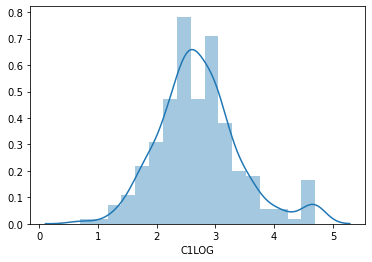

In [150]:
sns.distplot(ASI_Base1['C1LOG'])

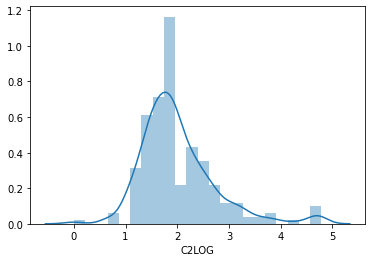

In [151]:
sns.distplot(ASI_Base1['C2LOG'])

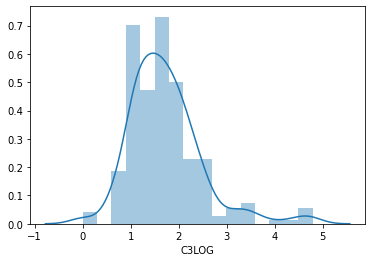

In [152]:
sns.distplot(ASI_Base1['C3LOG'])

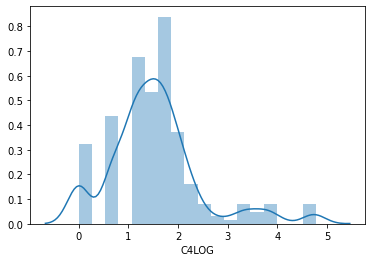

In [153]:
sns.distplot(ASI_Base1['C4LOG'])

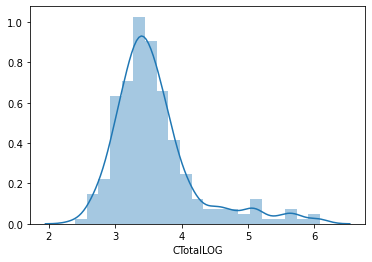

In [154]:
sns.distplot(ASI_Base1['CTotalLOG'])

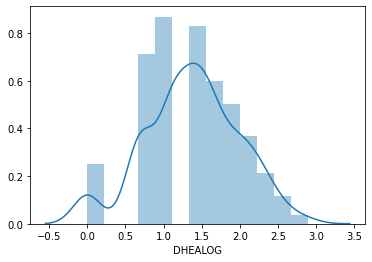

In [155]:
sns.distplot(ASI_Base1['DHEALOG'])

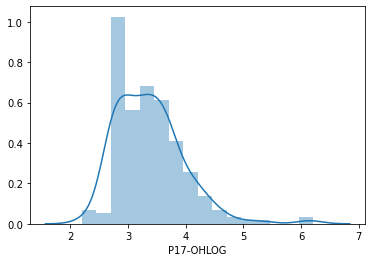

In [156]:
sns.distplot(ASI_Base1['P17-OHLOG'])

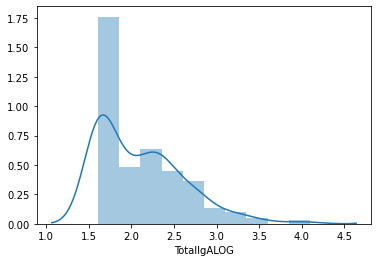

In [157]:
sns.distplot(ASI_Base1['TotalIgALOG'])

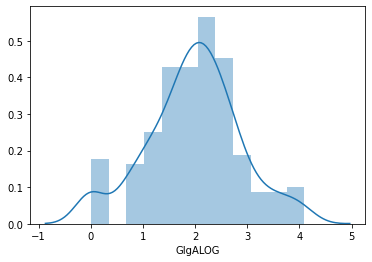

In [158]:
sns.distplot(ASI_Base1['GIgALOG'])

In [159]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(ASI_Base1)

     Age   C1   C2   C3   C4  CTotal  DHEA  P17-OH  TotalIgA  GIgA    AgeLOG  \
0     42   19    6    4    5      34     1      49         5    23  3.737670   
1     60   12    7    4    7      30     2      15         7     5  4.094345   
2     49   11    1    1    1      14     3      30         5     1  3.891820   
3     35   12    3    6    1      22     6      33        16     4  3.555348   
4     53   20    7    4    3      34     5       9         5    13  3.970292   
5     53   21    6    7    2      36     2      29        16    10  3.970292   
6     55   19    8   12    8      47     4      28         9     5  4.007333   
7     56   13    5    3    6      27     4      18         6     3  4.025352   
8     24   22    5    5    3      35     3      17        13     6  3.178054   
9     55   11    7   13    6      37     7      15        10     6  4.007333   
11    55    7    3    3   11      24     2      16         6    12  4.007333   
12    46   14    4    3    2      23    

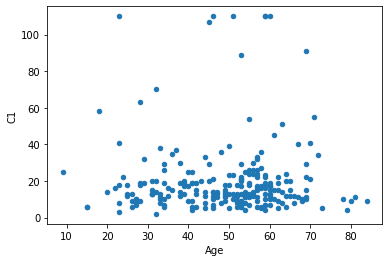

In [160]:
Plot = ASI_Base1.plot.scatter( x = 'Age', y = 'C1')

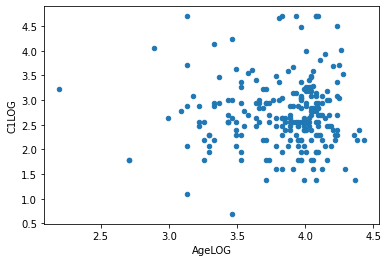

In [161]:
Plot = ASI_Base1.plot.scatter( x = 'AgeLOG', y = 'C1LOG')

In [163]:
x = ASI_Base1['AgeLOG']
y = ASI_Base1['C1LOG']

In [164]:
model = sm.OLS(y,x).fit()

In [170]:
pred_val = model.fittedvalues.copy()
true_val = ASI_Base1['C1LOG'].values.copy()
residual = true_val - pred_val

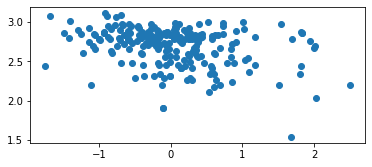

In [171]:
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

In [172]:
sms.diagnostic.het_breuschpagan(residual, ASI_Base1[['AgeLOG']])

(58.07517428692776, nan, 77.02417526868152, 3.736541076148828e-16)

In [173]:
sms.linear_harvey_collier(model)

Ttest_1sampResult(statistic=0.1469476238792065, pvalue=0.883302648333063)

In [174]:
transformed, _ = boxcox(ASI_Base1['Age'])

(array([ 2.,  2., 33., 30., 37., 46., 50., 22.,  7.,  4.]),
 array([1.25102756, 1.29581466, 1.34060177, 1.38538887, 1.43017597,
        1.47496308, 1.51975018, 1.56453729, 1.60932439, 1.6541115 ,
        1.6988986 ]),
 <a list of 10 Patch objects>)

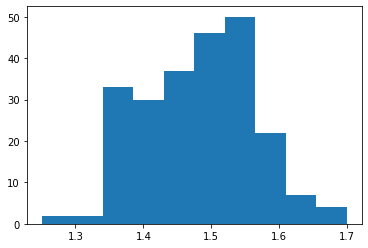

In [175]:
plt.hist(transformed)

In [176]:
x = transformed
model1 = sm.OLS(y,x).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  C1LOG   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.947
Method:                 Least Squares   F-statistic:                              4124.
Date:                Thu, 25 Feb 2021   Prob (F-statistic):                   9.79e-150
Time:                        21:16:52   Log-Likelihood:                         -229.45
No. Observations:                 233   AIC:                                      460.9
Df Residuals:                     232   BIC:                                      464.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.8411      0.029     64.220      0.000       1.785       1.898
==============================================================================
Omnibus:                       22.357   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.523
Skew:                           0.620   Prob(JB):                     1.43e-07
Kurtosis:                       4.307   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [179]:
pred_val1 = model1.fittedvalues.copy()
true_val1 = ASI_Base1['C1LOG'].values.copy()
residual1 = true_val1 - pred_val1

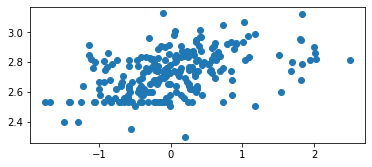

In [180]:
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val1)

In [182]:
sms.diagnostic.het_breuschpagan(residual1, ASI_Base1[['Age']])

(43.716567743860764, nan, 53.58231090638281, 4.037948580177709e-12)

In [183]:
sms.linear_harvey_collier(model1)

Ttest_1sampResult(statistic=-0.8959891338491406, pvalue=0.37119943996801685)

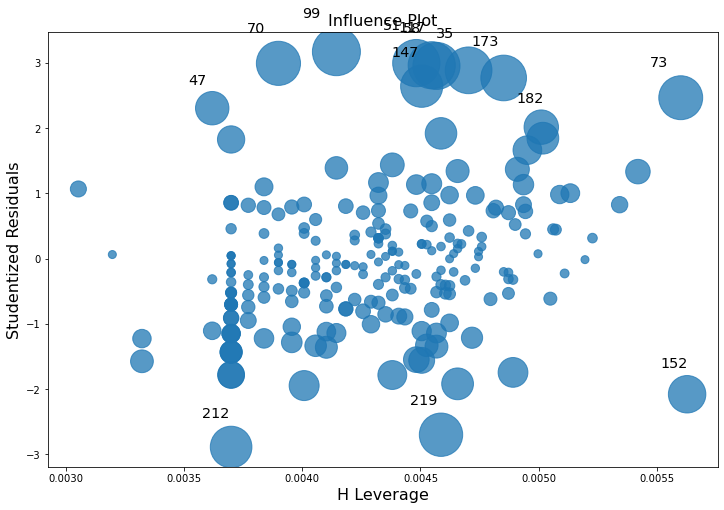

In [184]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model1, alpha = .05, ax = ax, criterion="cooks")

In [185]:
infl = model1.get_influence()
print(infl.summary_frame())

       dfb_x1       cooks_d  standard_resid  hat_diag  dffits_internal  \
0    0.007695  5.946607e-05        0.111671  0.004746         0.007711   
1   -0.004743  2.259748e-05       -0.078021  0.003699        -0.004754   
2   -0.036970  1.370867e-03       -0.558165  0.004381        -0.037025   
3   -0.030837  9.541781e-04       -0.461567  0.004459        -0.030890   
4    0.059128  3.493959e-03        1.068302  0.003052         0.059110   
5    0.029964  9.009490e-04        0.453986  0.004352         0.030016   
6    0.020659  4.284694e-04        0.314170  0.004322         0.020700   
7   -0.003689  1.366424e-05       -0.059084  0.003899        -0.003697   
8    0.048652  2.370919e-03        0.784484  0.003838         0.048692   
9   -0.012908  1.673169e-04       -0.212300  0.003699        -0.012935   
11  -0.058322  3.402988e-03       -0.948128  0.003771        -0.058335   
12  -0.008171  6.705678e-05       -0.125239  0.004257        -0.008189   
13   0.004220  1.788213e-05        0.0